# Proyek Analisis Data: Nama Dataset
- Nama: Royan Sabila Rosyad Wahyudi
- Email: royan230603@gmail.com
- Id Dicoding: royanrosyad85

## Menentukan Pertanyaan Bisnis

1. Kategori produk apa dengan pesanan terbanyak dan terendah?.
2. Wilayah mana dengan jumlah customer terbanyak?
3. Kapan terakhir kali nya customer melakukan transaksi?
4. Frekuensi seorang customer melakukan pembelian dalam beberapa bulan terakhir dianalisis
5. Berapa Total pengeluaran customer dalam beberapa bulan terakhir?

## Menyiapkan semua library yang dibutuhkan

In [10]:
!pip install unidecode


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import numpy as np
import pandas as pd
import urllib
import unidecode
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from datetime import datetime

## Data Wrangling

Data Wrangling merupakan proses untuk mengubah dan merapikan data yang tidak terstruktur atau kotor agar menjadi dataset terstruktur dan siap dianalisis. Langkah-langkahnya mencakup Gathering (mengumpulkan data dari berbagai sumber), Assessing (menilai data untuk mengidentifikasi masalah), serta Cleaning (membersihkan data dari beragam kekurangan atau penyimpangan yang telah ditemukan).

### Gathering Data

Pada tahap ini data yang digunakan berasal dari [E-Commerce Public Dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data). Berikut rincian dataset yang tersedia, yaitu:
1. customers_dataset.csv
2. geolocation_dataset.csv
3. order_items_dataset.csv
4. order_payments_dataset.csv
5. order_reviews_dataset.csv
6. orders_dataset.csv
7. products_dataset.csv
8. sellers_dataset.csv
9. product_category_name_translation.csv

Pada proejct ini data yang digunakan hanya Customers, Geolocation, Orders, Order Items, Products, dan Products Category

In [12]:
# Memuat data customers_df
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [13]:
# Memuat data geolocation
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [14]:
# Memuat data Data order
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
# Menampilkan Data Order Items
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [16]:
# Memuat data order_items_dataset
order_items_dataset = pd.read_csv('data/order_items_dataset.csv')
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [17]:
# Memuat Data Produk
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [18]:
# Memuat Data Kategori Produk
product_category_df = pd.read_csv('data/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Informasi:**
- Data yang digunakan hanya Customers, Geolocation, Orders, Order Items, Products, dan Products Category berupa penjualan marketplace di brazil dengan total 100 ribu order dari rentang tahun 2016 - 2018

### Assessing Data

Pada tahap ini, kita akan melakukan penilaian data dengan mengidentifikasi Missing Value, Data Duplikat, dan Nilai yang Tidak Akurat.

#### Menilai Data customers_df

In [19]:
# Memeriksa tipe data dari setiap kolom dalam data customers_df
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [20]:
# Count Missing Values Jika ada
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

No missing value di dalam data customer

In [21]:
# Menghitung Duplicated data
print("Duplicated Data: ",customers_df.duplicated().sum())

Duplicated Data:  0


No duplicated value di dalam data customer

In [22]:
# Ringkasan Parameter Statistika Deskriptif
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Data pelanggan saat ini belum menampilkan informasi penting, dan diperlukan analisis lebih lanjut untuk memahami karakteristik demografi konsumen.

#### Aseessing Data Geolocation

In [23]:
# Memuat Informasi Data Geolocation
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [24]:
# Cek Missing Value
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

No missing values dalam data geolocation

In [25]:
geolocation_df['geolocation_city'].unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

Dalam data geolocation muncul masalah karena kota "sao paulo" dan "são paulo" dianggap berbeda. Untuk mengatasinya, data harus dijadikan satu dengan membangun fungsi yang mengubah huruf diakritik menjadi huruf biasa.

In [26]:
# Menampilkan data yang duplikat
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


#### Assessing Orders Data

In [27]:
# Memeriksa tipe data dari setiap kolom dalam data orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Tipe data `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date` seharusnya datetime.

In [28]:
# Count missing values
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [29]:
# Count duplicated data
print("Duplicated Data: ",orders_df.duplicated().sum())

Duplicated Data:  0


Tidak ada duplicated data dalam order data

In [30]:
# Memuat parameter statistik deskriptif
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Assessing Order Item Data

In [31]:
# Memuat informasi data order_items_df
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [32]:
# Count missing values
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [33]:
# Count duplicated data
print("Duplicated Data: ",order_items_df.duplicated("order_id").sum())

Duplicated Data:  13984


Dalam dataset order_items_df, jumlah duplicated data sebanyak 13984 menunjukkan bahwa ada 13984 baris dengan nilai 'order_id' yang sama. Ini terjadi karena satu pesanan (order) dapat berisi beberapa item, sehingga baris-baris tersebut dianggap duplikat berdasarkan kolom 'order_id' saja.

In [34]:
# Memuat parameter statistik deskriptif
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Assessing Products Data

In [35]:
# Memuat informasi data products_df
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [36]:
# Count missing values
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [37]:
# Count duplicated data
print("Duplicated Data: ",products_df.duplicated().sum())

Duplicated Data:  0


Tidak ada duplicated data di dalam data products_df

In [38]:
# Memuat parameter statistik deskriptif
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Products:
- Banyak missing values pada hampir semua kolom kecuali `product_id`
- Kolom `product_name_lenght`, `product_description_lenght`, dan `product_photos_qty` seharusnya bertipe integer
- Kesalahan penulisan pada kolom `product_name_lenght` dan `product_description_lenght`

### Assessing Product Category

In [39]:
# Memuat informasi data product_category_df
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [40]:
# count missing values
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [41]:
# Count duplicated data
print("Duplicated Data: ",product_category_df.duplicated().sum())

Duplicated Data:  0


In [42]:
# Memuat parameter statistik deskriptif
product_category_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Insight Assessing Data

**Customers:**  
- Tidak ada missing values, data tidak akurat, maupun data duplikat

**Geolocation:**  
- Tidak ada missing values, tidak ada data tidak akurat  
- Banyak data duplikat karena hanya memuat prefix kode pos, selain itu “sao paulo” dan “são paulo” masih dianggap berbeda

**Orders:**  
- Kolom waktu (purchase, approved, delivered) seharusnya menjadi tipe datetime

**Order Items:**  
- Banyak data duplikat karena satu pesanan bisa berisi beberapa item

**Products:**  
- Banyak missing values selain di kolom product_id  
- Kolom product_name_lenght, product_description_lenght, dan product_photos_qty seharusnya bertipe integer  
- Ada kesalahan penulisan di kolom product_name_lenght dan product_description_lenght

### Cleaning Data

#### Cleaning Data Geolocation

Karena ada nama kota yang sama namun dihitung berbeda karena alphabet diacritic (seperti ã, ç, é), kita akan membersihkan data tersebut dengan mengubah alphabet diacritic menjadi alphabet biasa.

In [43]:
# Menggunakan unidecode untuk mengubah karakter non-ASCII
def remove_diacritic(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [44]:
# Menerapkan remove_diacritic kedalam geolocation_df
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].apply(remove_diacritic)

Prefix zip code disimpan oleh dataset, meskipun suffix berbeda dimiliki oleh setiap daerah. Oleh karena itu, suffix tersebut perlu diidentifikasi agar latitude dan longitude dapat ditentukan secara akurat.

In [45]:
# Count duplicated data dalam prefix zip code 
geolocation_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

In [46]:
# Contoh duplikasi data dengan kode zip 18540
geolocation_df[geolocation_df['geolocation_zip_code_prefix'] == 18540].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
390061,18540,-23.213643,-47.522045,porto feliz,SP
390065,18540,-23.214679,-47.507507,porto feliz,SP
390069,18540,-23.229738,-47.520951,porto feliz,SP
390071,18540,-23.219647,-47.523717,porto feliz,SP
390073,18540,-23.186414,-47.534778,porto feliz,SP


In [47]:
# Pencarian kode pos yang dimiliki oleh dua negara bagian menjadi masalah karena biasanya kode pos hanya dimiliki oleh satu wilayah.
zip_code_in_other_location = geolocation_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
zip_code_in_other_location[zip_code_in_other_location['count']>= 2].shape

(8, 2)

Delapan baris data ditemukan dengan kode pos yang sama untuk beberapa negara bagian.

In [48]:
# Memuat kode pos yang memiliki 2 lokasi
print(zip_code_in_other_location[zip_code_in_other_location['count']>= 2])

       geolocation_zip_code_prefix  count
367                           2116      2
1668                          4011      2
6506                         21550      2
6696                         23056      2
14664                        72915      2
15879                        78557      2
16146                        79750      2
16256                        80630      2


Karena dataset hanya menyimpan awal kode pos (prefix), satu kode pos dapat digunakan untuk wilayah yang berbeda. Oleh karena itu, hanya kode pos dari wilayah yang paling sering muncul dalam data yang akan disimpan.

In [49]:
# Hapus kode negara bagian yang duplikat dan simpan hanya untuk negara bagian yang paling sering muncul.
max_state = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

**Setelah kode pos dibuat unik, hitung median latitude dan longitude untuk merepresentasikan kode pos pada peta.**

In [50]:
# Kelompokkan data berdasarkan zip_code, city, dan state, lalu hitung latitude dan longitude menggunakan nilai median masing-masing.
geolocation_grouping = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
# Menggabungkan dataframe dengan data frekuensi zip code paling sering muncul
geolocation_grouping = geolocation_grouping.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [51]:
# Merge data geolocation dengan customer
customers_geolocation = customers_df.merge(geolocation_grouping,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

#### Cleaning Orders Data
Mengubah beberapa kolom menjadi format timestamp agar data tersebut bisa lebih mudah diolah atau dianalisis berdasarkan waktu

In [52]:
datetime_columns = ['order_purchase_timestamp','order_approved_at',
                     'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

#### Cleaning Order Items Data
Data pada order items mengandung banyak duplikat karena satu pesanan bisa mencakup berbagai produk. Oleh karena itu, perlu dihitung total harga, nilai pengiriman, dan batas maksimal tanggal pengiriman (shipping limit date).

In [53]:
total_per_order = order_items_df.groupby('order_id').agg({'price':sum,'freight_value':sum,'shipping_limit_date':max }).reset_index()

C:\Users\royan\AppData\Local\Temp\ipykernel_25244\3528457768.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\royan\AppData\Local\Temp\ipykernel_25244\3528457768.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\royan\AppData\Local\Temp\ipykernel_25244\3528457768.py:1: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



<Axes: xlabel='price', ylabel='freight_value'>

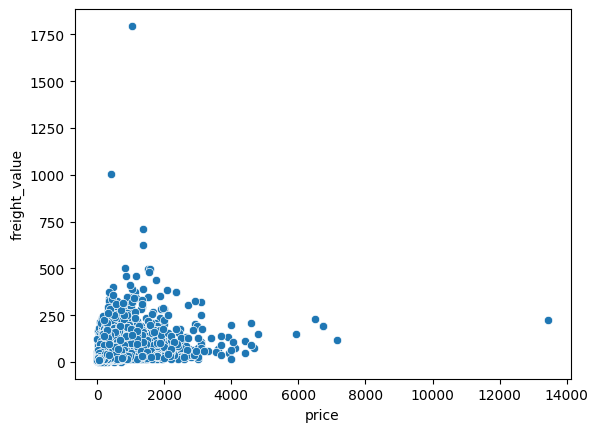

In [54]:
sns.scatterplot(x='price',y='freight_value',data=total_per_order)

Terdapat outlier yang signifikan, sehingga perlu dilakukan penghapusan data yang berada di luar nilai 99 persen persentil untuk menjaga konsistensi analisis.

In [55]:
total_per_order.describe()

,price,freight_value
count,98666.000000,98666.000000
mean,137.754076,22.823562
std,210.645145,21.650909
min,0.850000,0.000000
25%,45.900000,13.850000
50%,86.900000,17.170000
75%,149.900000,24.040000
max,13440.000000,1794.960000


In [56]:
# Remove Outliers
freight_value_persentil = total_per_order['freight_value'].quantile(0.99)
total_per_order = total_per_order[(total_per_order['price'] <= 5000) & (total_per_order['freight_value'] <= freight_value_persentil)]

In [57]:
total_per_order.describe()

,price,freight_value
count,97679.000000,97679.000000
mean,132.046700,21.423227
std,185.015685,14.133667
min,0.850000,0.000000
25%,45.900000,13.790000
50%,85.000000,17.070000
75%,149.900000,23.700000
max,4690.000000,104.980000


Outlier terlihat memiliki dampak signifikan terhadap perubahan data, misalnya harga rata-rata pesanan menjadi \$132.

#### Cleaning Products Data

- Sebagian besar kolom kecuali product_id mengandung missing values  
- Kolom `product_name_lenght`, `product_description_lenght`, dan `product_photos_qty` semestinya bertipe integer  
- Ada penulisan yang keliru di kolom `product_name_lenght` dan `product_description_lenght`

In [58]:
# Ubah nama kolom yang typo
products_df.rename(columns={'product_name_lenght': 'product_name_length',
                            'product_description_lenght': 'product_description_length'},
                   inplace=True)

Replace semua missing value dengan mean

In [59]:
columns = [
    'product_name_length', 'product_description_length', 'product_photos_qty',
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'
]

for col in columns:
    products_df[col].fillna(products_df[col].mean(), inplace=True)

C:\Users\royan\AppData\Local\Temp\ipykernel_25244\288154774.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [60]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_length             0
product_description_length      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

Fill product_category_name dengan metode interpolate

In [61]:
products_df['product_category_name'].interpolate(method='pad', axis=0, limit_direction='forward', inplace=True)

C:\Users\royan\AppData\Local\Temp\ipykernel_25244\686135949.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\royan\AppData\Local\Temp\ipykernel_25244\686135949.py:1: FutureWarning:

Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [62]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Ubah tipe data kolom `product_name_lenght`, `product_description_lenght`, dan `product_photos_qty` ke format integer agar data dapat diolah lebih efisien

In [63]:
columns = ['product_name_length', 'product_description_length', 'product_photos_qty']

for col in columns:
    products_df[col] = products_df[col].astype(int)

In [64]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_length         32951 non-null  int32  
 3   product_description_length  32951 non-null  int32  
 4   product_photos_qty          32951 non-null  int32  
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(4), int32(3), object(2)
memory usage: 1.9+ MB


Merge `products_df` dan `product_category_df`

In [65]:
products_with_category_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how='outer',
    left_on='product_category_name',
    right_on='product_category_name'
)
products_with_category_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,07f01b6fcacc1b187a71e5074199db2d,agro_industria_e_comercio,39,430,1,16400.0,63.0,66.0,56.0,agro_industry_and_commerce
1,613d093272cb8f74f25a01e430155a6a,agro_industria_e_comercio,39,326,1,1050.0,38.0,41.0,39.0,agro_industry_and_commerce
2,44e8945e17aef03daaecbc4bbab7f730,agro_industria_e_comercio,48,771,2,200.0,16.0,2.0,11.0,agro_industry_and_commerce
3,980ecbcc15fe174ec1e5757c4d75b1bf,agro_industria_e_comercio,48,157,1,250.0,17.0,3.0,10.0,agro_industry_and_commerce
4,ba1d7e7ee1f055d252a2faa8ea3cea9b,agro_industria_e_comercio,59,693,6,1900.0,45.0,15.0,40.0,agro_industry_and_commerce


In [66]:
# Merge data order_items_df dengan products_with_category_df
order_items_with_category_df = pd.merge(
    left=order_items_df,
    right=products_with_category_df,
    how='outer',
    left_on='product_id',
    right_on='product_id'
)
order_items_with_category_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,f30149f4a8882a08895b6a242aa0d612,1,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59,perfumaria,53,596,6,300.0,20.0,16.0,16.0,perfumery
1,f5eda0ded77c1293b04c953138c8331d,1,00088930e925c41fd95ebfe695fd2655,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93,automotivo,56,752,4,1225.0,55.0,10.0,26.0,auto
2,0bf736fd0fd5169d60de3699fcbcf986,1,0009406fd7479715e4bef61dd91f2462,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10,cama_mesa_banho,50,266,2,300.0,45.0,15.0,35.0,bed_bath_table
3,3aba44d8e554ab4bb8c09f6f78032ca8,1,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60,utilidades_domesticas,25,364,3,550.0,19.0,24.0,12.0,housewares
4,6f0dfb5b5398b271cc6bbd9ee263530e,1,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60,utilidades_domesticas,25,364,3,550.0,19.0,24.0,12.0,housewares


In [67]:
# Merge Orders dengan Customers
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_geolocation,
    how='outer',
    left_on='customer_id',
    right_on='customer_id'
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04,248ffe10d632bebe4f7267f1f44844c9,6273.0,osasco,SP,6273.0,osasco,SP,-23.499314,-46.767550
1,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04,b0015e09bb4b6e47c52844fab5fb6638,35550.0,itapecerica,MG,35550.0,itapecerica,MG,-20.471945,-45.123145
2,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22,94b11d37cd61cb2994a194d11f89682b,29830.0,nova venecia,ES,29830.0,nova venecia,ES,-18.707824,-40.398960
3,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664.0,mendonca,MG,39664.0,mendonca,MG,-21.770599,-43.355230
4,0ab7fb08086d4af9141453c91878ed7a,000379cdec625522490c315e70c7a9fb,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18,0b83f73b19c2019e182fd552c048a22c,4841.0,sao paulo,SP,4841.0,sao paulo,SP,-23.738482,-46.689273


Merge All Data

In [68]:
all_data = pd.merge(
    left=order_items_with_category_df,
    right=orders_customers_df,
    how='outer',
    left_on='order_id',
    right_on='order_id'
)
all_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_length,product_description_length,...,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,28013.0,campos dos goytacazes,RJ,-21.762829,-41.310605
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,15775.0,santa fe do sul,SP,-20.205737,-50.926924
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,35661.0,para de minas,MG,-19.870383,-44.594355
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,12952.0,atibaia,SP,-23.104346,-46.595589
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,13226.0,varzea paulista,SP,-23.245512,-46.825182


**Insight:**
- Proses pembersihan dari Missing Values, Duplicated Data, dan Inaccurate Value telah dilakukan sehingga siap untuk eksplorasi dan visualisasi  
- Penggabungan semua data menjadi satu telah dilakukan berdasarkan foreign_key tertentu

## Exploratory Data Analysis (EDA)

### Explore All Data

In [69]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117568 entries, 0 to 117567
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117568 non-null  object        
 1   order_item_id                  116773 non-null  float64       
 2   product_id                     116773 non-null  object        
 3   seller_id                      116773 non-null  object        
 4   shipping_limit_date            116773 non-null  object        
 5   price                          116773 non-null  float64       
 6   freight_value                  116773 non-null  float64       
 7   product_category_name          116773 non-null  object        
 8   product_name_length            116773 non-null  float64       
 9   product_description_length     116773 non-null  float64       
 10  product_photos_qty             116773 non-null  float64       
 11  

In [70]:
all_data.describe()

,order_item_id,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,116773.000000,116773.000000,116773.000000,116773.000000,116773.000000,116773.000000,116773.000000,116773.000000,116773.000000,116773.000000,117568,117403,115547,114240,117568,117262.000000,117262.000000,117262.000000,117262.000000
mean,1.198342,120.804169,20.005671,48.767609,788.547258,2.206743,2098.879090,30.175010,16.591308,23.014856,2017-12-31 13:40:14.162161920,2017-12-31 23:52:37.391165184,2018-01-05 03:40:58.584783360,2018-01-14 14:56:10.651540992,2018-01-24 09:58:57.778987264,35294.677909,35294.677909,-21.193908,-46.215771
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1003.000000,1003.000000,-33.690972,-72.670987
25%,1.000000,39.900000,13.080000,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,2017-09-13 14:55:13,2017-09-13 22:47:10.500000,2017-09-18 21:40:37,2017-09-26 21:22:32.750000128,2017-10-04 00:00:00,11437.000000,11437.000000,-23.588086,-48.068549
50%,1.000000,74.990000,16.280000,51.000000,610.000000,2.000000,700.000000,25.000000,13.000000,20.000000,2018-01-19 11:01:51,2018-01-19 17:18:22,2018-01-24 18:48:43,2018-02-02 20:42:18,2018-02-15 00:00:00,24436.000000,24436.000000,-22.920643,-46.639559
75%,1.000000,134.900000,21.160000,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,2018-05-04 13:56:23,2018-05-04 18:15:54,2018-05-08 13:15:00,2018-05-15 19:49:37.500000,2018-05-25 00:00:00,59848.750000,59848.750000,-20.069626,-43.694505
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,99990.000000,99990.000000,45.065933,9.341528
std,0.704493,183.869641,15.787906,9.954789,648.350549,1.709434,3758.442736,16.169183,13.430369,11.733221,NaN,NaN,NaN,NaN,NaN,29863.767153,29863.767153,5.558591,4.031736


In [78]:
# Jumlah pesanan per kategori produk
order_category_df = all_data.groupby('product_category_name_english')['order_id'].nunique().reset_index(name='order_count')

# Sort untuk kategori tertinggi dan terendah
best_categories = order_category_df.sort_values(by='order_count', ascending=False).head(5)
best_categories

,product_category_name_english,order_count
7,bed_bath_table,9534
43,health_beauty,8970
65,sports_leisure,7803
15,computers_accessories,6711
39,furniture_decor,6580


In [79]:
worst_categories = order_category_df.sort_values(by='order_count', ascending=True).head(5)
worst_categories

,product_category_name_english,order_count
61,security_and_services,2
29,fashion_childrens_clothes,8
11,cds_dvds_musicals,12
52,la_cuisine,13
46,home_comfort_2,24


In [80]:
# Count Jumlah pelanggan setiap wilayah
customer_geolocation_count = all_data.groupby('geolocation_state')['customer_unique_id'].nunique().reset_index(name='customer_count')
# Sort untuk wilayah dengan pelanggan terbanyak dan terendah
most_customers = customer_geolocation_count.sort_values(by='customer_count', ascending=False)
print(most_customers)

   geolocation_state  customer_count
25                SP           40267
18                RJ           12353
10                MG           11248
22                RS            5273
17                PR            4871
23                SC            3534
4                 BA            3268
7                 ES            1959
8                 GO            1939
6                 DF            1913
15                PE            1605
5                 CE            1310
13                PA             946
12                MT             875
9                 MA             722
11                MS             694
14                PB             517
16                PI             479
19                RN             472
1                 AL             400
24                SE             341
26                TO             272
20                RO             238
2                 AM             143
0                 AC             116
3                 AP              67
2

**Insight:**
- Kategori "bed bath services" telah diidentifikasi sebagai kategori yang memiliki jumlah pesanan terbanyak.  
- Kategori "security and services" telah diidentifikasi sebagai katogori yang memiliki jumlah pesanan terendah.  
- Wilayah yang memiliki banyak pelanggan adalah SP atau Sao Paulo
- Wilayah yang memiliki sedikit pelanggan adalah RJ atau Rio de Janeiro

## Visualization & Explanatory Analysis

#### Question 1: Kategori produk apa dengan pesanan terbanyak dan terendah?

In [88]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Urutkan best_categories dari terbanyak ke terendah
best_categories = best_categories.sort_values('order_count', ascending=False)

# Urutkan worst_categories dari terendah ke tertinggi
worst_categories = worst_categories.sort_values('order_count', ascending=True)

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=("Best Performing Categories", "Worst Performing Categories"),
                    specs=[[{"type": "bar"}, {"type": "bar"}]])

# Add best categories bar chart
fig.add_trace(
    go.Bar(
        x=best_categories['order_count'],
        y=best_categories['product_category_name_english'],
        marker_color=['#72BCD4'] + ['#D3D3D3'] * (len(best_categories) - 1),
        orientation='h',
        name='Best Categories'
    ),
    row=1, col=1
)

# Add worst categories bar chart
fig.add_trace(
    go.Bar(
        x=worst_categories['order_count'],
        y=worst_categories['product_category_name_english'],
        marker_color=['#72BCD4'] + ['#D3D3D3'] * (len(worst_categories) - 1),
        orientation='h',
        name='Worst Categories'
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text="Best and Worst Performing Categories by Order Count",
    height=500,
    width=1500,
    autosize=True,
    margin=dict(l=50, r=50, t=80, b=50),
    showlegend=False,
    template="plotly_white",
    font=dict(family="Arial", size=12)
)

# Update axes
fig.update_xaxes(title_text="Jumlah Pesanan", row=1, col=1)
fig.update_xaxes(title_text="Jumlah Pesanan", row=1, col=2)
fig.update_yaxes(title_text=None, row=1, col=1)
fig.update_yaxes(title_text=None, row=1, col=2)

fig.show()